# Unsupervised ML (Clustering)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,ANDAMAN,2001,13,0,0,3,0,3,2,...,4,113,0,18,1,9,0,0,310,637
1,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,...,0,5,0,1,0,0,0,0,13,21
2,A & N ISLANDS,TOTAL,2001,13,0,0,3,0,3,2,...,4,118,0,19,1,9,0,0,323,658
3,A & N ISLANDS,ANDAMAN,2002,14,3,0,1,0,1,2,...,2,92,0,16,3,4,0,0,316,580
4,A & N ISLANDS,NICOBAR,2002,3,0,1,1,0,1,0,...,0,5,0,1,0,0,0,0,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,WEST BENGAL,SEALDAH G.R.P.,2012,19,9,2,0,0,0,7,...,0,62,1,14,2,0,0,0,39,657
9013,WEST BENGAL,SILIGURI G.R.P.,2012,4,1,0,0,0,0,3,...,0,0,1,8,1,0,0,0,58,248
9014,WEST BENGAL,SILIGURI_PC,2012,32,6,6,21,0,21,123,...,3,812,3,35,12,370,0,69,385,3023
9015,WEST BENGAL,UTTAR DINAJPUR,2012,110,283,10,92,0,92,306,...,33,1105,9,150,5,623,0,3,1839,5212


In [3]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [4]:
c=[ 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']

In [5]:
for i in c:
    print(f'{i} :{df[i].sum(axis=0)}')

MURDER :805086
ATTEMPT TO MURDER :703954
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER :89228
RAPE :478274
CUSTODIAL RAPE :52
OTHER RAPE :478222
KIDNAPPING & ABDUCTION :713714
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS :527814
KIDNAPPING AND ABDUCTION OF OTHERS :185900
DACOITY :118818
PREPARATION AND ASSEMBLY FOR DACOITY :63882
ROBBERY :496534
BURGLARY :2234678
THEFT :7001060
AUTO THEFT :2540740
OTHER THEFT :4460320
RIOTS :1549854
CRIMINAL BREACH OF TRUST :368042
CHEATING :1535194
COUNTERFIETING :53436
ARSON :227408
HURT/GREVIOUS HURT :6743752
DOWRY DEATHS :182404
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY :906310
INSULT TO MODESTY OF WOMEN :248108
CRUELTY BY HUSBAND OR HIS RELATIVES :1750402
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES :1784
CAUSING DEATH BY NEGLIGENCE :2003728
OTHER IPC CRIMES :19605658
TOTAL IPC CRIMES :47881308


In [6]:
df.drop([ 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'OTHER RAPE', 
       'KIDNAPPING AND ABDUCTION OF OTHERS', 
       'PREPARATION AND ASSEMBLY FOR DACOITY',
       'AUTO THEFT', 'OTHER THEFT', 'CRIMINAL BREACH OF TRUST',

       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],inplace=True,axis=1)

In [7]:
df.drop('KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',inplace=True,axis=1)

In [8]:
df=df[df['DISTRICT']!='TOTAL'][df[df['DISTRICT']!='TOTAL']['DISTRICT']!='DELHI UT TOTAL']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8597 entries, 0 to 9015
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   STATE/UT                8597 non-null   object
 1   DISTRICT                8597 non-null   object
 2   YEAR                    8597 non-null   int64 
 3   MURDER                  8597 non-null   int64 
 4   RAPE                    8597 non-null   int64 
 5   CUSTODIAL RAPE          8597 non-null   int64 
 6   KIDNAPPING & ABDUCTION  8597 non-null   int64 
 7   DACOITY                 8597 non-null   int64 
 8   ROBBERY                 8597 non-null   int64 
 9   BURGLARY                8597 non-null   int64 
 10  THEFT                   8597 non-null   int64 
 11  RIOTS                   8597 non-null   int64 
 12  CHEATING                8597 non-null   int64 
 13  COUNTERFIETING          8597 non-null   int64 
 14  ARSON                   8597 non-null   int64 
 15  HURT/GREV

In [10]:
df_sc=pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv',names=['STATE/UT','DISTRICT','YEAR','Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against SCs'])
df_sc.drop(0,inplace=True,axis=0)
for i in ['Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against SCs']:
    df_sc[i]=df_sc[i].astype('int')
    
df_st=pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv',names=['STATE/UT','DISTRICT','YEAR','Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against STs'])
df_st.drop(0,inplace=True,axis=0)
for i in ['Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against STs']:
    df_st[i]=df_st[i].astype('int')
df_ch=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv',names=['STATE/UT','DISTRICT','YEAR','Murder','Rape','Kidnapping and Abduction','Foeticide','Abetment of suicide','Exposure and abandonment','Procuration of minor girls','Buying of girls for prostitution','Selling of girls for prostitution','Prohibition of child marriage act','Other Crimes','Total'])
df_ch.drop(0,inplace=True,axis=0)
df_ch=df_ch.fillna(0)
for i in ['Murder','Rape','Kidnapping and Abduction','Foeticide','Abetment of suicide','Exposure and abandonment','Procuration of minor girls','Buying of girls for prostitution','Selling of girls for prostitution','Prohibition of child marriage act','Other Crimes','Total']:
    
    df_ch[i]=df_ch[i].astype('int')
df_w=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv',names=['STATE/UT','DISTRICT','YEAR','Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls'])
df_w.drop(0,inplace=True,axis=0)
for i in ['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']:
    df_w[i]=df_w[i].astype('int')

In [11]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 1 to 9015
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   STATE/UT                           9015 non-null   object
 1   DISTRICT                           9015 non-null   object
 2   YEAR                               9015 non-null   object
 3   Murder                             9015 non-null   int32 
 4   Rape                               9015 non-null   int32 
 5   Kidnapping and Abduction           9015 non-null   int32 
 6   Foeticide                          9015 non-null   int32 
 7   Abetment of suicide                9015 non-null   int32 
 8   Exposure and abandonment           9015 non-null   int32 
 9   Procuration of minor girls         9015 non-null   int32 
 10  Buying of girls for prostitution   9015 non-null   int32 
 11  Selling of girls for prostitution  9015 non-null   int32 
 12  Prohib

In [12]:
df_sc

,STATE/UT,DISTRICT,YEAR,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
1,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
2,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
3,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
4,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
5,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9014,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9017,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [13]:
df_sc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 1 to 9018
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9018 non-null   object
 1   DISTRICT                              9018 non-null   object
 2   YEAR                                  9018 non-null   object
 3   Murder                                9018 non-null   int32 
 4   Rape                                  9018 non-null   int32 
 5   Kidnapping and Abduction              9018 non-null   int32 
 6   Dacoity                               9018 non-null   int32 
 7   Robbery                               9018 non-null   int32 
 8   Arson                                 9018 non-null   int32 
 9   Hurt                                  9018 non-null   int32 
 10  Prevention of atrocities (POA) Act    9018 non-null   int32 
 11  Protection of Civil Rights (PC

In [14]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 1 to 9018
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9018 non-null   object
 1   DISTRICT                              9018 non-null   object
 2   YEAR                                  9018 non-null   object
 3   Murder                                9018 non-null   int32 
 4   Rape                                  9018 non-null   int32 
 5   Kidnapping and Abduction              9018 non-null   int32 
 6   Dacoity                               9018 non-null   int32 
 7   Robbery                               9018 non-null   int32 
 8   Arson                                 9018 non-null   int32 
 9   Hurt                                  9018 non-null   int32 
 10  Prevention of atrocities (POA) Act    9018 non-null   int32 
 11  Protection of Civil Rights (PC

In [15]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 1 to 9017
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   object
 3   Rape                                                 9017 non-null   int32 
 4   Kidnapping and Abduction                             9017 non-null   int32 
 5   Dowry Deaths                                         9017 non-null   int32 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int32 
 7   Insult to modesty of Women                           9017 non-null   int32 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int32 
 9

In [16]:
df_sc['Total Crimes Against SCs']=df_sc['Murder']+df_sc['Rape']+df_sc['Kidnapping and Abduction']+df_sc['Dacoity']+df_sc['Robbery']+df_sc['Arson']+df_sc['Hurt']+df_sc['Prevention of atrocities (POA) Act']+df_sc['Protection of Civil Rights (PCR) Act']+df_sc['Other Crimes Against SCs']

In [17]:
df_sc=df_sc[df_sc['DISTRICT']!='TOTAL'][df_sc[df_sc['DISTRICT']!='TOTAL']['DISTRICT']!='DELHI UT TOTAL']

In [18]:
df_sc=df_sc[['STATE/UT','DISTRICT','YEAR','Total Crimes Against SCs']]

In [19]:

df_st['Total Crimes Against STs']=df_st['Murder']+df_st['Rape']+df_st['Kidnapping and Abduction']+df_st['Dacoity']+df_st['Robbery']+df_st['Arson']+df_st['Hurt']+df_st['Protection of Civil Rights (PCR) Act']+df_st['Prevention of atrocities (POA) Act']+df_st['Other Crimes Against STs']
df_st=df_st[df_st['DISTRICT']!='TOTAL'][df_st[df_st['DISTRICT']!='TOTAL']['DISTRICT']!='DELHI UT TOTAL']

df_st=df_st[['STATE/UT','DISTRICT','YEAR','Total Crimes Against STs']]

In [20]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8597 entries, 1 to 9017
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   STATE/UT                  8597 non-null   object
 1   DISTRICT                  8597 non-null   object
 2   YEAR                      8597 non-null   object
 3   Total Crimes Against STs  8597 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 302.2+ KB


In [21]:
df_ch=df_ch[df_ch['DISTRICT']!='TOTAL'][df_ch[df_ch['DISTRICT']!='TOTAL']['DISTRICT']!='DELHI UT TOTAL']
df_ch['Total Crimes Against Child']=df_ch['Total']

In [22]:
df_ch=df_ch[['STATE/UT','DISTRICT','YEAR','Total Crimes Against Child']]

In [23]:
df_ch

,STATE/UT,DISTRICT,YEAR,Total Crimes Against Child
1,ANDHRA PRADESH,ADILABAD,2001,0
2,ANDHRA PRADESH,ANANTAPUR,2001,66
3,ANDHRA PRADESH,CHITTOOR,2001,0
4,ANDHRA PRADESH,CUDDAPAH,2001,0
5,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9008,DELHI,STF,2012,0
9009,DELHI,WEST,2012,542
9011,LAKSHADWEEP,LAKSHADWEEP,2012,0
9013,PUDUCHERRY,KARAIKAL,2012,7


In [24]:
df_w=df_w[df_w['DISTRICT']!='TOTAL'][df_w[df_w['DISTRICT']!='TOTAL']['DISTRICT']!='DELHI UT TOTAL']
df_w['Total Crimes Against Women']=df_w['Rape']+df_w['Kidnapping and Abduction']+df_w['Dowry Deaths']+df_w['Assault on women with intent to outrage her modesty']+df_w['Insult to modesty of Women']+df_w['Cruelty by Husband or his Relatives']+df_w['Importation of Girls']
df_w=df_w[['STATE/UT','DISTRICT','YEAR','Total Crimes Against Women']]


In [25]:
df_w

,STATE/UT,DISTRICT,YEAR,Total Crimes Against Women
1,ANDHRA PRADESH,ADILABAD,2001,454
2,ANDHRA PRADESH,ANANTAPUR,2001,356
3,ANDHRA PRADESH,CHITTOOR,2001,456
4,ANDHRA PRADESH,CUDDAPAH,2001,278
5,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9011,DELHI,STF,2012,0
9012,DELHI,WEST,2012,739
9013,LAKSHADWEEP,LAKSHADWEEP,2012,2
9015,PUDUCHERRY,KARAIKAL,2012,11


In [26]:
df_sc['YEAR']=df['YEAR'].astype('int')
df_st['YEAR']=df['YEAR'].astype('int')
df_ch['YEAR']=df['YEAR'].astype('int')
df_w['YEAR']=df['YEAR'].astype('int')

In [27]:
dfa=pd.merge(df,df_sc,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','YEAR'])
dfb=dfa.merge(df_st,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','YEAR'])
dfc=dfb.merge(df_w,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','YEAR'])
df=dfc.merge(df_ch,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','YEAR'])

In [28]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
0,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,2,0,0,0,0,0,5,0,0,1,0
1,A & N ISLANDS,ANDAMAN,2003,16,2,0,2,1,7,56,58,19,13,0,7,107,0,1,22,6
2,A & N ISLANDS,ANDAMAN,2003,16,2,0,2,1,7,56,58,19,13,0,7,107,0,1,22,8
3,A & N ISLANDS,ANDAMAN,2003,16,2,0,2,1,7,56,58,19,13,0,7,107,0,1,22,9
4,A & N ISLANDS,ANDAMAN,2003,16,2,0,2,1,7,56,58,19,13,0,7,107,0,1,21,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80940,WEST BENGAL,SILIGURI G.R.P.,2012,4,0,0,3,1,1,0,167,2,0,1,0,0,0,0,4,0
80941,WEST BENGAL,UTTAR DINAJPUR,2012,110,92,0,306,13,29,7,435,51,64,6,33,1105,0,0,492,66
80942,WEST BENGAL,UTTAR DINAJPUR,2012,110,92,0,306,13,29,7,435,51,64,6,33,1105,0,0,492,0
80943,WEST BENGAL,UTTAR DINAJPUR,2012,110,92,0,306,13,29,7,435,51,64,6,33,1105,0,0,592,66


In [29]:
df=df.groupby(['STATE/UT','DISTRICT']).sum().reset_index()

In [30]:
df.drop('YEAR',inplace=True,axis=1.)

In [31]:
c=['MURDER','RAPE','CUSTODIAL RAPE','KIDNAPPING & ABDUCTION','DACOITY','ROBBERY','BURGLARY','THEFT','RIOTS','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','Total Crimes Against SCs','Total Crimes Against STs','Total Crimes Against Women','Total Crimes Against Child']

In [32]:
for i in c:
    print(df[i].sum(axis=0))

3719893
2413069
121
2666399
599296
2534329
11343115
29121226
8835165
6136433
217325
1127487
34417761
3649939
836794
19076189
2232734


In [33]:
df.drop('CUSTODIAL RAPE',inplace=True,axis=1)

In [34]:
x=df.iloc[:,2:]

### 4.1  Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [35]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_model=km.fit_predict(x)

In [36]:
x[y_model==0]

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
6,11579,3649,6433,804,3887,75394,152333,3080,58113,446,1977,222606,10718,3497,94062,1745
7,9629,3527,5634,257,1804,40941,115345,9629,27130,1646,2855,309453,16140,1721,86228,1704
9,16874,4832,9040,551,3577,35793,147211,12759,41473,1150,6253,177632,17581,3026,107106,7427
11,35511,24167,35306,1994,7243,68016,155351,51811,126813,3179,17922,821372,57619,8654,385574,56235
12,31748,13129,20980,1683,6285,69476,141285,35116,49057,165,12968,348677,27136,14525,261734,14780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,13290,6536,5108,4647,13507,65389,97682,43107,24481,283,12659,266264,7380,752,83160,12124
416,40012,19736,7844,9444,20268,96156,173852,107836,38764,3080,14256,296680,11620,6140,195668,29212
419,7723,3583,3732,4417,10470,38592,53585,26662,14774,362,5095,164714,7750,513,50181,5115
494,16915,20403,14813,9381,53289,170171,339056,27902,48324,15,9635,420411,27957,448,96838,2368


In [37]:
x[y_model==1]

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
0,725,462,251,52,381,3387,4169,885,1394,1,451,5291,0,69,1412,411
1,130,2,1,24,0,22,73,0,4,0,30,97,0,4,22,1
2,5541,2991,2759,412,1904,12559,16349,4996,7091,71,2029,71580,3159,1415,45383,2013
3,4993,917,2378,302,728,6817,15188,2897,3522,320,755,38843,3835,1068,14771,980
4,4165,1066,2805,240,658,9550,40471,2681,9291,390,1312,39334,4325,20,26762,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,3639,2526,6319,536,1103,833,17663,20035,3960,137,493,301,41,20,28867,278
728,3822,1949,1638,402,1357,289,12968,4510,1890,16,94,2593,36,30,12518,8
729,617,44,248,32,459,0,13072,548,413,36,0,1624,0,0,431,2
730,239,2,129,27,61,1,5463,101,10,33,0,0,0,8,249,20


In [38]:
x[y_model==2]

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
10,13146,6205,14636,1174,8463,143153,594723,15328,225538,2471,3892,504463,12294,520,188719,10460
150,11146,5435,21801,2620,37920,94213,624027,16636,32031,1365,527,161122,10516,475,157849,14816
279,29733,7647,34377,4721,78640,190826,1255588,42600,332433,7522,728,339276,11780,110,95473,5799
343,20930,33031,13583,594,37332,291760,541753,26726,36823,1102,3595,191657,52014,6650,195943,34649
357,32158,27875,14124,1694,44371,281681,872013,38208,38225,1850,8869,387611,33978,10424,235692,100971
415,14684,6324,7672,6820,18564,202484,389684,46832,56756,1488,2376,125708,4332,664,108312,11657
420,16162,10715,13513,4075,69039,149877,570875,76752,95750,2362,4626,159949,2290,31,77578,42524


### 4.2  Create DataFrame for each cluster that shows data according to the areas.

#####  Peaceful Area's

In [39]:
peaceful_area=df[y_model==0]
peaceful_area

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
6,ANDHRA PRADESH,CYBERABAD,11579,3649,6433,804,3887,75394,152333,3080,58113,446,1977,222606,10718,3497,94062,1745
7,ANDHRA PRADESH,EAST GODAVARI,9629,3527,5634,257,1804,40941,115345,9629,27130,1646,2855,309453,16140,1721,86228,1704
9,ANDHRA PRADESH,GUNTUR,16874,4832,9040,551,3577,35793,147211,12759,41473,1150,6253,177632,17581,3026,107106,7427
11,ANDHRA PRADESH,KARIMNAGAR,35511,24167,35306,1994,7243,68016,155351,51811,126813,3179,17922,821372,57619,8654,385574,56235
12,ANDHRA PRADESH,KHAMMAM,31748,13129,20980,1683,6285,69476,141285,35116,49057,165,12968,348677,27136,14525,261734,14780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,MAHARASHTRA,NANDED,13290,6536,5108,4647,13507,65389,97682,43107,24481,283,12659,266264,7380,752,83160,12124
416,MAHARASHTRA,NASIK RURAL,40012,19736,7844,9444,20268,96156,173852,107836,38764,3080,14256,296680,11620,6140,195668,29212
419,MAHARASHTRA,PARBHANI,7723,3583,3732,4417,10470,38592,53585,26662,14774,362,5095,164714,7750,513,50181,5115
494,ODISHA,KHURDA,16915,20403,14813,9381,53289,170171,339056,27902,48324,15,9635,420411,27957,448,96838,2368


##### Moderate Area's

In [40]:
moderate_area=df[y_model==1]
moderate_area


,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
0,A & N ISLANDS,ANDAMAN,725,462,251,52,381,3387,4169,885,1394,1,451,5291,0,69,1412,411
1,A & N ISLANDS,NICOBAR,130,2,1,24,0,22,73,0,4,0,30,97,0,4,22,1
2,ANDHRA PRADESH,ADILABAD,5541,2991,2759,412,1904,12559,16349,4996,7091,71,2029,71580,3159,1415,45383,2013
3,ANDHRA PRADESH,ANANTAPUR,4993,917,2378,302,728,6817,15188,2897,3522,320,755,38843,3835,1068,14771,980
4,ANDHRA PRADESH,CHITTOOR,4165,1066,2805,240,658,9550,40471,2681,9291,390,1312,39334,4325,20,26762,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,WEST BENGAL,PURAB MIDNAPUR,3639,2526,6319,536,1103,833,17663,20035,3960,137,493,301,41,20,28867,278
728,WEST BENGAL,PURULIA,3822,1949,1638,402,1357,289,12968,4510,1890,16,94,2593,36,30,12518,8
729,WEST BENGAL,SEALDAH G.R.P.,617,44,248,32,459,0,13072,548,413,36,0,1624,0,0,431,2
730,WEST BENGAL,SILIGURI G.R.P.,239,2,129,27,61,1,5463,101,10,33,0,0,0,8,249,20


##### Sensitive Area's

In [41]:
sensitive_area=df[y_model==2]
sensitive_area

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child
10,ANDHRA PRADESH,HYDERABAD CITY,13146,6205,14636,1174,8463,143153,594723,15328,225538,2471,3892,504463,12294,520,188719,10460
150,GUJARAT,AHMEDABAD COMMR.,11146,5435,21801,2620,37920,94213,624027,16636,32031,1365,527,161122,10516,475,157849,14816
279,KARNATAKA,BANGALORE COMMR.,29733,7647,34377,4721,78640,190826,1255588,42600,332433,7522,728,339276,11780,110,95473,5799
343,MADHYA PRADESH,BHOPAL,20930,33031,13583,594,37332,291760,541753,26726,36823,1102,3595,191657,52014,6650,195943,34649
357,MADHYA PRADESH,INDORE,32158,27875,14124,1694,44371,281681,872013,38208,38225,1850,8869,387611,33978,10424,235692,100971
415,MAHARASHTRA,NASIK COMMR.,14684,6324,7672,6820,18564,202484,389684,46832,56756,1488,2376,125708,4332,664,108312,11657
420,MAHARASHTRA,PUNE COMMR.,16162,10715,13513,4075,69039,149877,570875,76752,95750,2362,4626,159949,2290,31,77578,42524


### 4.3  "Analyze your clusters and prepare a report that explains all your observations.

In [42]:
peaceful_area['Total Crime']=x[y_model==0].sum(axis=1)
peaceful_area.sort_values(by='Total Crime',ascending=True,inplace=True)
peaceful_area.head(10)

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child,Total Crime
380,MADHYA PRADESH,SHEOPUR,4090,5406,3216,587,2571,10579,17494,8154,3591,48,824,197425,12674,6020,23842,2232,298753
20,ANDHRA PRADESH,PRAKASHAM,11112,2642,5575,942,2373,19105,38488,6383,14918,542,5162,165114,15987,2305,67908,2200,360756
287,KARNATAKA,CHICKMAGALUR,8003,2918,3508,1299,4002,33051,40599,32242,11635,727,952,171200,17800,1149,44413,3104,376602
19,ANDHRA PRADESH,NIZAMABAD,9897,2668,5290,1402,2970,32616,37238,7636,17257,285,4037,190252,6553,2313,68623,2288,391325
288,KARNATAKA,CHITRADURGA,8703,5247,5460,814,5005,23321,46744,57696,10518,778,1334,171816,13363,3437,38034,1374,393644
419,MAHARASHTRA,PARBHANI,7723,3583,3732,4417,10470,38592,53585,26662,14774,362,5095,164714,7750,513,50181,5115,397268
16,ANDHRA PRADESH,MEDAK,12998,5660,5122,1176,2273,27388,51041,5811,14601,988,5715,193919,12271,1495,63422,6024,409904
359,MADHYA PRADESH,JABALPUR,6581,7996,2832,97,8097,41689,74633,6134,7546,290,1889,221566,6667,4413,52482,8331,451243
15,ANDHRA PRADESH,MAHABOOBNAGAR,24477,8274,8825,1796,4880,36620,72034,19234,15241,943,6385,156835,26052,5926,79252,6526,473300
324,KERALA,KOZHIKODE COMMR.,1813,4187,2838,520,18847,45242,93594,68766,33733,768,4125,129760,4517,192,70629,4214,483745


<Axes: >

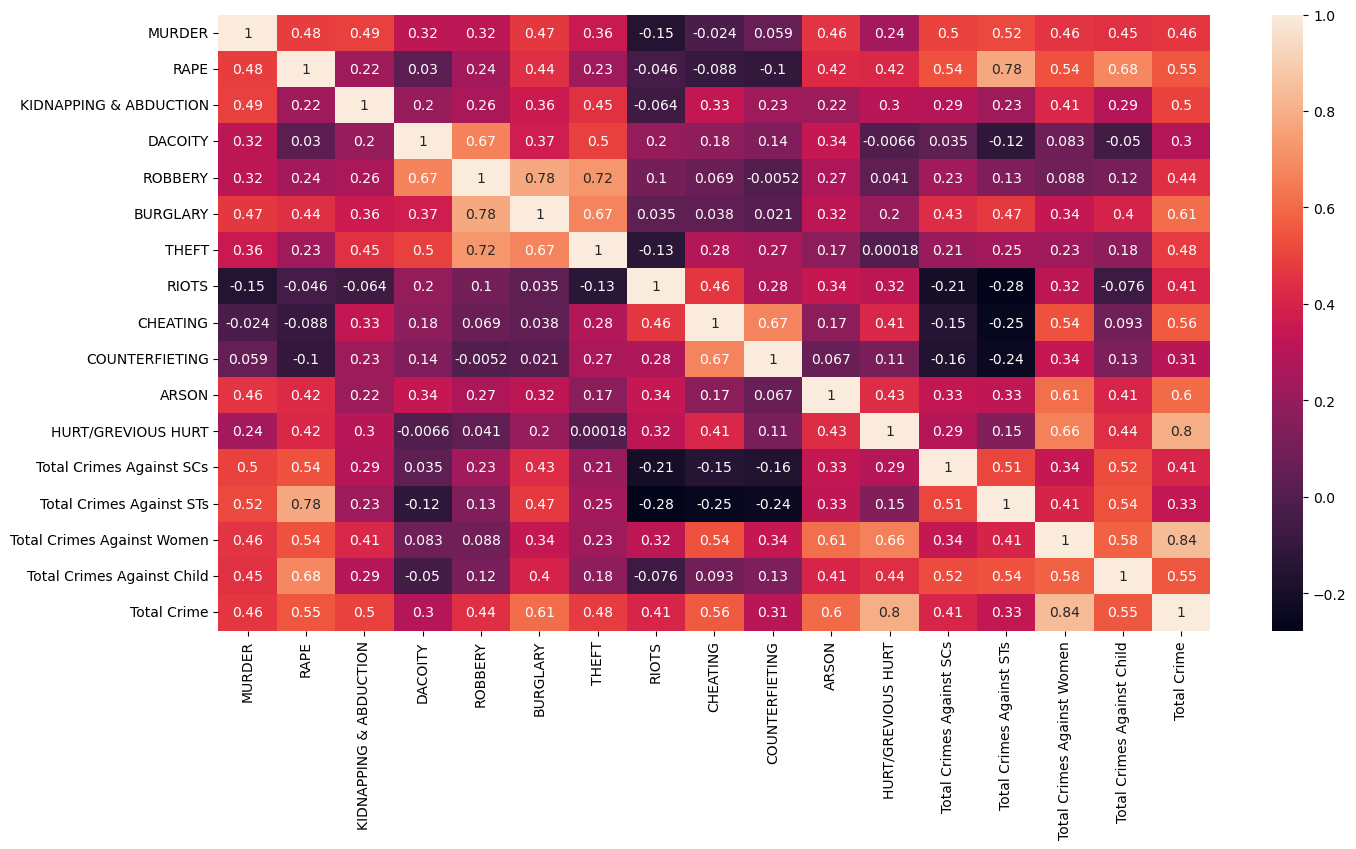

In [43]:
plt.figure(figsize=(16,8))
sns.heatmap(peaceful_area.iloc[:,2:].corr(),annot=True)


We have sorted Top 10 Peaceful districts, from them most peaceful district is Railways Katra from J&K States, other peaceful districts like Longleng, Anjaw, W.Rly Ahmedabad, Nicobar, Baddi police dist and Sopre are the joint sencond most Peacefull districts.


In [44]:
sensitive_area['Total Crime']=x[y_model==2].sum(axis=1)
sensitive_area.sort_values(by='Total Crime',ascending=False,inplace=True)
sensitive_area.head(10)

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total Crimes Against SCs,Total Crimes Against STs,Total Crimes Against Women,Total Crimes Against Child,Total Crime
279,KARNATAKA,BANGALORE COMMR.,29733,7647,34377,4721,78640,190826,1255588,42600,332433,7522,728,339276,11780,110,95473,5799,2437253
357,MADHYA PRADESH,INDORE,32158,27875,14124,1694,44371,281681,872013,38208,38225,1850,8869,387611,33978,10424,235692,100971,2129744
10,ANDHRA PRADESH,HYDERABAD CITY,13146,6205,14636,1174,8463,143153,594723,15328,225538,2471,3892,504463,12294,520,188719,10460,1745185
343,MADHYA PRADESH,BHOPAL,20930,33031,13583,594,37332,291760,541753,26726,36823,1102,3595,191657,52014,6650,195943,34649,1488142
420,MAHARASHTRA,PUNE COMMR.,16162,10715,13513,4075,69039,149877,570875,76752,95750,2362,4626,159949,2290,31,77578,42524,1296118
150,GUJARAT,AHMEDABAD COMMR.,11146,5435,21801,2620,37920,94213,624027,16636,32031,1365,527,161122,10516,475,157849,14816,1192499
415,MAHARASHTRA,NASIK COMMR.,14684,6324,7672,6820,18564,202484,389684,46832,56756,1488,2376,125708,4332,664,108312,11657,1004357


<Axes: >

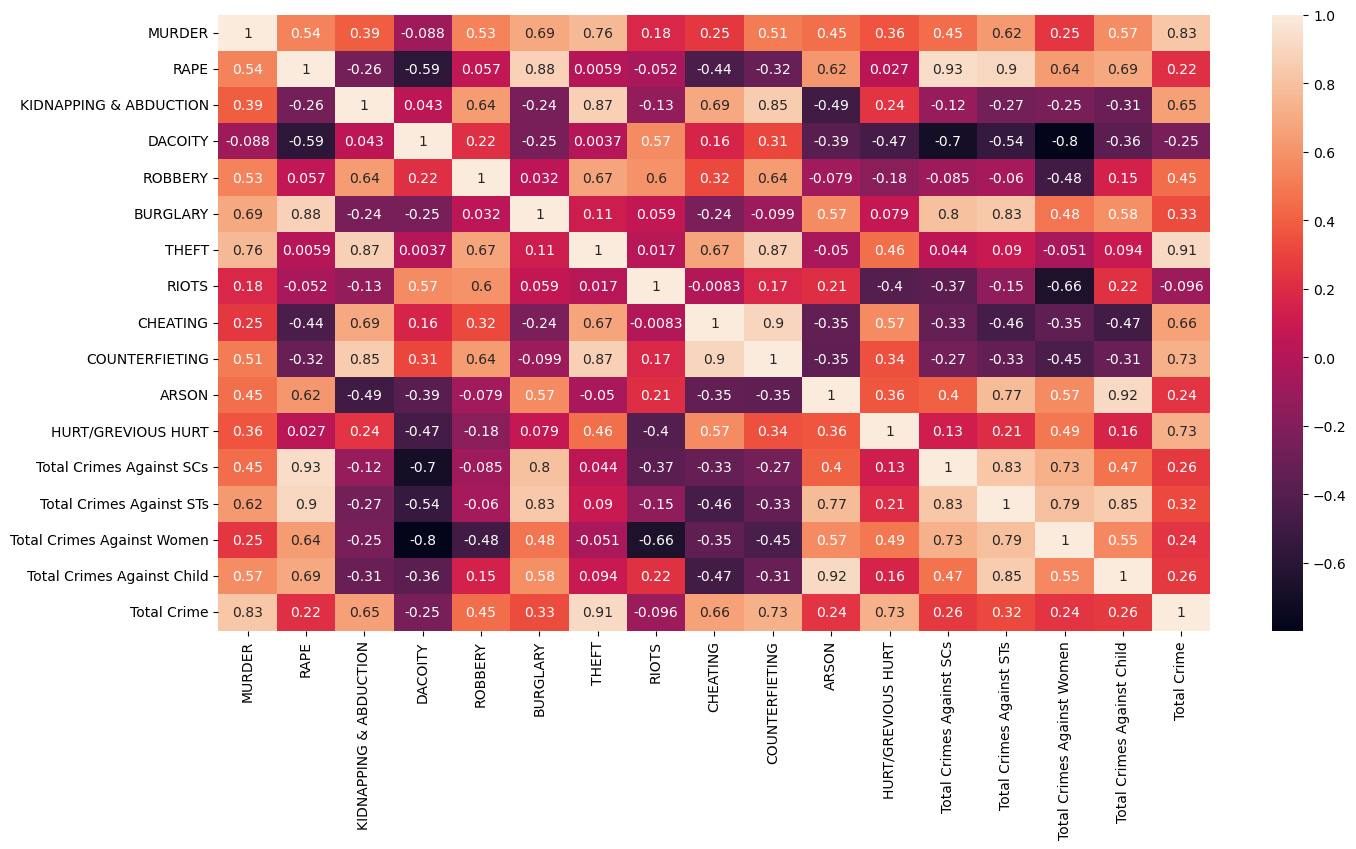

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(sensitive_area.iloc[:,2:].corr(),annot=True)

Text(0.5, 1.0, 'RIOTS Vs ROBBERY')

<Figure size 1600x400 with 0 Axes>

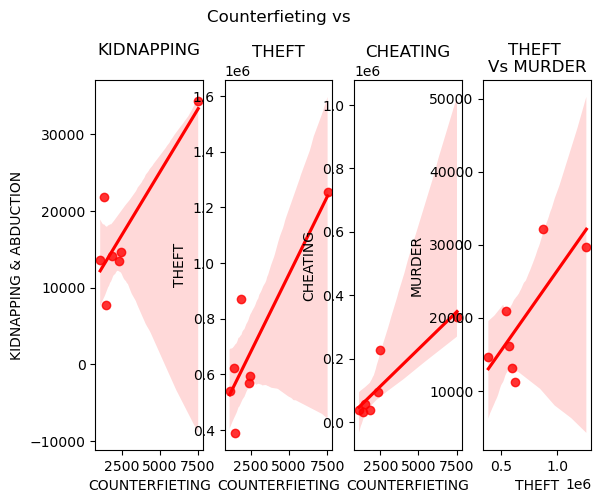

<Figure size 400x400 with 0 Axes>

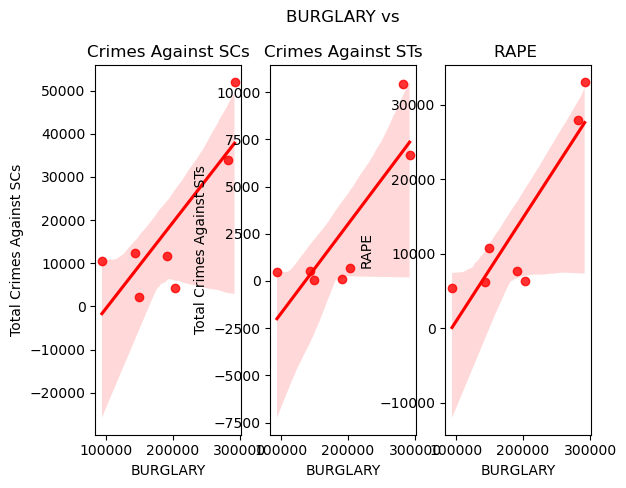

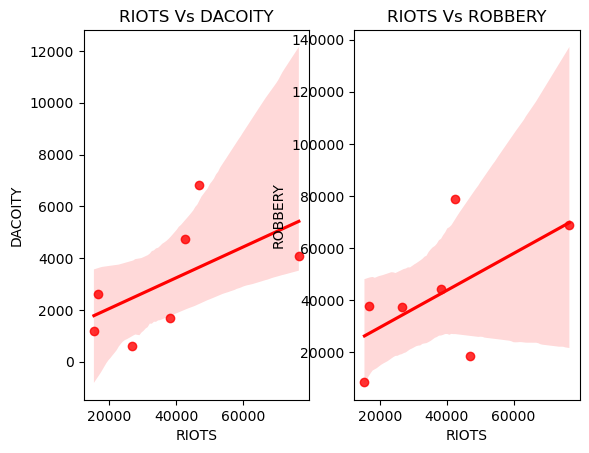

In [46]:
plt.figure(figsize=(16,4))
fig,axes=plt.subplots(1,4)

plt.subplot(1,4,1)
sns.regplot(sensitive_area,x='COUNTERFIETING',y='KIDNAPPING & ABDUCTION',marker='o',color='r')
axes[0].set_xlabel('COUNTERFIETING')
axes[0].set_ylabel('KIDNAPPING & ABDUCTION')
axes[0].set_title(f'KIDNAPPING\n')

plt.subplot(1,4,2)
sns.regplot(sensitive_area,x='COUNTERFIETING',y='THEFT',marker='o',color='r')
axes[1].set_xlabel('COUNTERFIETING')
axes[1].set_ylabel('THEFT')
axes[1].set_title(f'Counterfieting vs\n\nTHEFT')

plt.subplot(1,4,3)
sns.regplot(sensitive_area,x='COUNTERFIETING',y='CHEATING',marker='o',color='r')
axes[2].set_xlabel('COUNTERFIETING')
axes[2].set_ylabel('CHEATING')
axes[2].set_title(f'CHEATING')

plt.subplot(1,4,4)
sns.regplot(sensitive_area,x='THEFT',y='MURDER',marker='o',color='r')
axes[3].set_xlabel('THEFT')
axes[3].set_ylabel('MURDER')
axes[3].set_title(f'THEFT \nVs MURDER')




plt.figure(figsize=(4,4))
fig,axes=plt.subplots(1,3)

plt.subplot(1,3,1)
sns.regplot(sensitive_area,x='BURGLARY',y='Total Crimes Against SCs',marker='o',color='r')
axes[0].set_xlabel('BURGLARY')
axes[0].set_ylabel('Total Crimes Against SCs')
axes[0].set_title(f'Crimes Against SCs')

plt.subplot(1,3,2)
sns.regplot(sensitive_area,x='BURGLARY',y='Total Crimes Against STs',marker='o',color='r')
axes[1].set_xlabel('BURGLARY')
axes[1].set_ylabel('Total Crimes Against STs')
axes[1].set_title(f'''BURGLARY vs\n\nCrimes Against STs''')

plt.subplot(1,3,3)
sns.regplot(sensitive_area,x='BURGLARY',y='RAPE',marker='o',color='r')
axes[2].set_xlabel('BURGLARY')
axes[2].set_ylabel('RAPE')
axes[2].set_title(f'RAPE ')



fig,axes=plt.subplots(1,2)

plt.subplot(1,2,1)
sns.regplot(sensitive_area,x='RIOTS',y='DACOITY',marker='o',color='r')
axes[0].set_xlabel('RIOTS')
axes[0].set_ylabel('DACOITY')
axes[0].set_title(f'RIOTS Vs DACOITY')

plt.subplot(1,2,2)
sns.regplot(sensitive_area,x='RIOTS',y='ROBBERY',marker='o',color='r')
axes[1].set_xlabel('RIOTS')
axes[1].set_ylabel('ROBBERY')
axes[1].set_title(f'RIOTS Vs ROBBERY')





###### Counterfeiting and Crime Control:
we have point out that controlling counterfeiting can have a positive impact on various crimes. By addressing counterfeiting, we can potentially reduce theft, kidnapping, dacoity, and cheating in sensitive areas, and once we can controll theft then we can also can be controll Murder.
Counterfeiting often involves illegal production or distribution of fake goods, currency, or documents. When these activities are curtailed, it disrupts criminal networks and reduces opportunities for related crimes.
###### Burglary and Crimes Against SCs and STs: 
Our observation about controlling burglary to address crimes against Scheduled Castes (SCs) and Scheduled Tribes (STs) is insightful.
Burglary involves unlawful entry into buildings with the intent to commit theft, Rape With SCs and STs or other crimes. By improving security measures and community vigilance, we can potentially prevent both burglary and crimes against marginalized communities.
###### Riots and Dacoity/Robbery:
Controlling riots can indeed contribute to reducing dacoity and robbery. Riots often escalate into violent situations, leading to property damage and theft.
By promoting social harmony, addressing underlying tensions, and ensuring effective law enforcement during potential conflict situations, we can mitigate the risk of riots and their associated crimes.

### 4.3.4 Capstone project overall story in your own words. Min 1000 words.

India is most Populated country with over 1.40 billion people in 3.29 Area Km2, So kind of Dense Country there is problem with Significant Crimes Over all Country. According to national Crime Bureau (NCRB) of India in 2011 crime rate 18.9%, in 2010 it was 18%, so there is 0.9% crime had increased in India.Acccording to Open Government Data (OGD) there is countinously increased crime in india. Because of Gradually increased crime in india, So citizens are being insecure to come out alone from home. there is so many violance happen with Women, child and minorities cast.
According to NCRB in 2011, there were more than 2.3 lacs reported incidents of crime against women and in 2010 there wre 2.15 lacs incidents reported against women, which is 7% increased y previous year. By Our dataset column correlation , we can prevent this crime by controlling Dacoity, Crimes against SCs and STs. there is more rape case in reported with lower cast communities. In 2011 crime rates against SCs is 31.8% which is decreased by 3% compared to 2010, but still we can prevent crimes further.
In 2011 crime rate against STs is 19.2% which is decreased by 6% compared to 2010 , but still we can focus further, To prevent rape cases and crimes against Women.
According to Times of india , nearly 33,100 cases were reported in 2011 against child, and 26,694 cases reported in 2010. Uttar Pradesh accounts for 16.6% of total crime against children in 2011, followed by Madhya Pradesh (13.2%), Delhi(12.8%) , Maharashtra (10.2%), Bihar (6.7%) and Andhra Pradesh (6.7%), According to our dataset column correlation, we can prevent crimes against child by controlling arson and crimes against STs.
Andhra Pradesh, Karnataka, Madhya Pradesh, Maharashtra and West Bengal are most sensitive States, where bulglary, Murder, Theft, Counterfieting, Dacoity, Robbery are more impacted to Total Crimes.
In India Diu & Daman, A & N Island, Goa, Sikkim, Nagaland, Mizoram, Tripura, Manipur, Meghalaya and Arunachal Pradesh are peaceful States.
That was we have analyzed from Capston Project.




# Thank You